# Part I - Loan Data Exploration
## by William Bartlett

## Introduction
> This dataset is composed of more than 100,000 loans of various types that were originated in the past. This dataset has plenty of quantitative and qualitative data on the specifications of the loan, and the attributes of the borrower.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
loan_df = pd.read_csv('prosperLoanData.csv')
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [3]:
loan_df.head(15)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0000,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0000,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0000,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0000,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0000,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0000,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0000,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0000,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0000,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0000,0,0,0.0,1


### What is the structure of your dataset?

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

### What is/are the main feature(s) of interest in your dataset?

> I am interested to know the most critical factors and conditions that lead to a loan not being repaid. I want to explore quantiative factors such as interest rate, income, and payment amount. I am also interested in qualitative attributes such as how credit score and homeownership are related to borrower strength and loan outcome. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the following features will help: Credit Score, Borrower Interest Rate, Monthly Income, Monthly Payment Amount, Loan Status, Loan Category, and Homeownership.

## Univariate Exploration


### Loan Status

> I want to start by looking broadly at the status of loans in this dataset. I am doing this because ulitmately in my analysis I want to look at how specific borrower conditions (employment status, debt-to-income, Credit Score, State, etc.) and loan conidtions (interest rate, monthly payment) are related to the status/outcome of the loan.

Text(0.5,1,'Count of Loan Status')

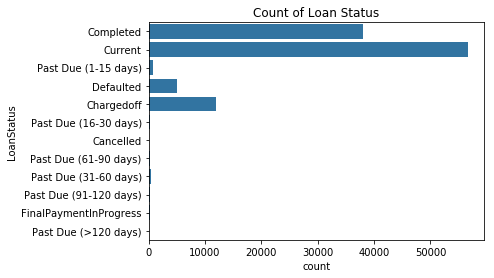

In [4]:
base_color = sb.color_palette()[0]
sb.countplot(data = loan_df, y = 'LoanStatus', color = base_color)
plt.title('Count of Loan Status')

> It seems that most loans are in completed or current status, which I will look at as a positive outcome. There are, however, a lot of loans in Defaulted or Chargedoff status which is a negative outcome. 

In [5]:
loan_df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### Monthly Income and Loan Payment

> I want to now see the distribution of monthly income and monthly loan payments. I think it would be helpful to look at these figures next to each other given that monthly incomce is probably an important factor in one's ablility to repay their loan.

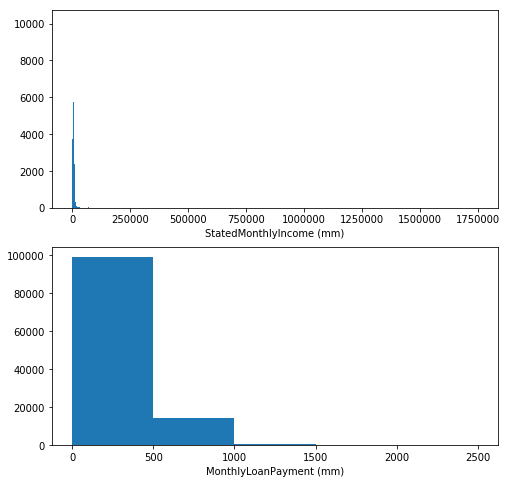

In [6]:
fig, ax = plt.subplots(nrows=2, figsize = [8,8])

variables = ['StatedMonthlyIncome', 'MonthlyLoanPayment']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(loan_df[var]), max(loan_df[var])+500, 500)
    ax[i].hist(data = loan_df, x = var, bins = bins)
    ax[i].set_xlabel('{} (mm)'.format(var))

plt.show();

>These charts indicate that there are outlier values, so in order to get a better understanding of the data we will filter out these outliers. 

In [7]:
loan_df.sort_values('StatedMonthlyIncome', ascending=False)['StatedMonthlyIncome']

53167     1.750003e+06
53014     6.185478e+05
17411     4.833333e+05
57133     4.666667e+05
8066      4.166667e+05
113270    3.944000e+05
82831     2.500000e+05
8870      2.083333e+05
56867     1.850818e+05
83697     1.850818e+05
80075     1.583333e+05
45028     1.500000e+05
63925     1.404167e+05
59298     1.208333e+05
111265    1.087500e+05
35218     1.083333e+05
78431     1.033341e+05
48469     1.000000e+05
59928     9.626650e+04
63149     9.166667e+04
13039     8.333333e+04
15355     8.333333e+04
59263     8.333333e+04
52293     8.333333e+04
69108     8.000000e+04
60563     7.916667e+04
59542     7.836442e+04
20708     7.836442e+04
93680     7.833333e+04
65099     7.666667e+04
              ...     
83152     0.000000e+00
64821     0.000000e+00
45197     0.000000e+00
105932    0.000000e+00
57237     0.000000e+00
68466     0.000000e+00
89372     0.000000e+00
100129    0.000000e+00
21440     0.000000e+00
103827    0.000000e+00
79725     0.000000e+00
45078     0.000000e+00
83232     0

In [8]:
outliers = (loan_df['StatedMonthlyIncome'] > 100000) | (loan_df['MonthlyLoanPayment'] > 1750)

In [9]:
print(loan_df.loc[outliers,['StatedMonthlyIncome','MonthlyLoanPayment']])

        StatedMonthlyIncome  MonthlyLoanPayment
8066           4.166667e+05               87.10
8572           1.033333e+04             2218.53
8870           2.083333e+05              415.18
14493          5.000000e+03             1778.38
17411          4.833333e+05              326.62
17504          1.916667e+04             2153.38
20533          6.416667e+03             1781.28
35218          1.083333e+05                0.00
45028          1.500000e+05              169.78
49093          2.500000e+04             2179.22
49134          1.650000e+04             1753.39
53014          6.185478e+05              366.62
53167          1.750003e+06              173.71
55456          8.333333e+03             1768.47
56867          1.850818e+05              811.97
57133          4.666667e+05              174.20
58393          1.075000e+04             1808.84
58766          1.300000e+04             2163.63
59298          1.208333e+05              561.21
63925          1.404167e+05             

In [10]:
loan_df_nonrich = loan_df.query('StatedMonthlyIncome < 15000')

In [11]:
loan_df_nonrich['StatedMonthlyIncome'].max()

14997.916667

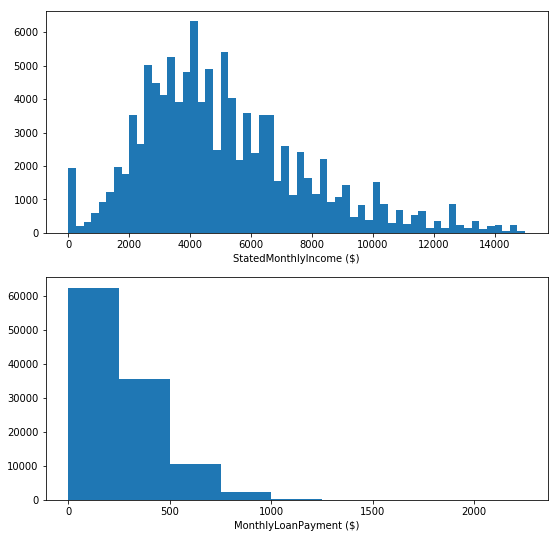

In [12]:
fig, ax = plt.subplots(nrows=2, figsize = [9,9])

variables = ['StatedMonthlyIncome', 'MonthlyLoanPayment']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(loan_df_nonrich[var]), max(loan_df_nonrich[var])+250, 250)
    ax[i].hist(data = loan_df_nonrich, x = var, bins = bins)
    ax[i].set_xlabel('{} ($)'.format(var))
    
plt.show();

>The majority of loanees have monthly income between 2 and 6 thousand dollars, while most of these loans have a monthly payment of less than 500 dollars.

### Borrower Interest Rate

> I would like to see the distribution of interest rates across the population. Higher interest rates indicate higher risk in the transaction and also make it more expensive and difficult for the loanee to repay the loan.

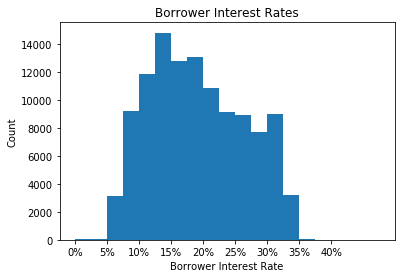

In [13]:
ticks = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
ticks_new = []
for n in ticks:
    ticks_new.append('{:,.0%}'.format(n))
bins = np.arange(0, loan_df['BorrowerRate'].max(), .025)
plt.hist(data = loan_df, x ='BorrowerRate', bins = bins)
plt.title('Borrower Interest Rates')
plt.xticks(ticks, ticks_new)
plt.xlabel('Borrower Interest Rate')
plt.ylabel('Count');

> Here you can see the breakdown of the loans by Borrower Interest Rate. Most loans fall between 10 and 30%. It looks like the interest rates in general are rather high, with an average rate around 20%!

### Employment Status

> Is employment status something that can be analyzed?

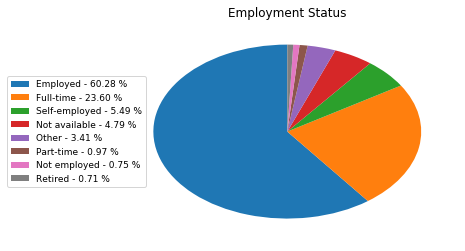

In [14]:
employment_status_counts = loan_df['EmploymentStatus'].value_counts()
slices = employment_status_counts

patches, texts = plt.pie(slices,
   startangle=90)

labels = ['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(employment_status_counts.index,
100.*slices/slices.sum())]
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.35, .5), fontsize=9)
plt.title('Employment Status');

> The majority of loanees are employed, but a significant minority are not listed as employed or Full-Time. It's difficult to analyze this because it's not clear what the difference between employed generally and full-time.

### Credit Score

> I would like to know the distribution of credit scores. Higher credit scores indicate less credit risk in the transaction.

In [15]:
loan_cs_df = loan_df[(loan_df['CreditScoreRangeLower'] != 0) & (loan_df['CreditScoreRangeLower'].notna())] 


In [16]:
loan_cs_df['CreditScoreRangeLower'].min()

360.0

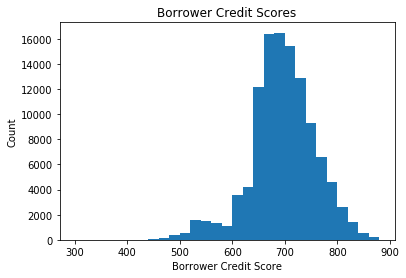

In [17]:
bins = np.arange(300, loan_cs_df['CreditScoreRangeLower'].max()+20, 20)
plt.hist(data = loan_cs_df, x = 'CreditScoreRangeLower', bins = bins)
plt.title('Borrower Credit Scores')
ticks = [300, 400, 500, 600, 700, 800, 900]
plt.xticks(ticks)
plt.xlabel('Borrower Credit Score')
plt.ylabel('Count');

> The vast majority of credit scores are between 600 and 800

### Loan Delinquencies in the Past 7 Years

>I also think that the amount of delinquencies each borrower had in the past 7 years at the time of loan origination will be an import factor that will have an impact on the status of the loan. 

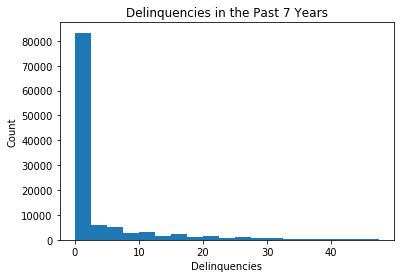

In [18]:
loan_df_7 = loan_df[(loan_df['DelinquenciesLast7Years'].notna())]
bins = np.arange(0, 50, 2.5)
plt.hist(data = loan_df_7, x = 'DelinquenciesLast7Years', bins = bins)
plt.title('Delinquencies in the Past 7 Years')
plt.xlabel('Delinquencies')
plt.ylabel('Count');


In [19]:
loan_df['DelinquenciesLast7Years'].max()

99.0

> Most borrowers have had zero delinquencies over the past 7 year, but a minority of borrowers have had delinquencies and some have had a lot of them. It will be interesting to see later if the borrowers with many delinquencies at the time of loan origination had a higher instance of negative loan outcome (defaulted or chargedoff loan status).

### Homeownership

> I also want to analyze the effect of homeownership on loan outcome so I first want to see a comparison of the count of homeowners vs non-homeowners.

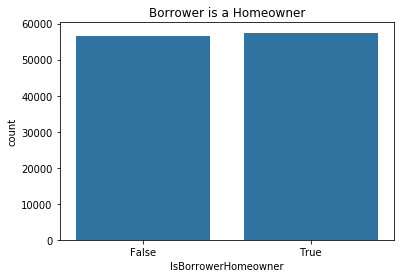

In [20]:
base_color = sb.color_palette()[0]
sb.countplot(data = loan_df, x = 'IsBorrowerHomeowner', color = base_color)
plt.title('Borrower is a Homeowner');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I want to find the variables in the dataset that are most associated with a negative loan status. I will be looking closely at interest rate, monthly payment, income, credit scores, and delinquencies. I did perform transformations to visualize the monthly income data because there were outliers. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> It was interesting that the amount of homeowners and non-homeowners were the same. I expected there to be more homeowners. 

## Bivariate Exploration


### Credit Score and Interest Rate Relationship

> First I would like to see the relationship between Credit Score and Interest Rate. I expect this to be a negative correlation because a higher Credit Score means there is less credit risk and less credit risk means the rate will be lower. I will be shocked if this isn't the case so I need to make sure that it is. 

In [21]:
loan_df_samp = loan_df.sample(n=500, replace = False)

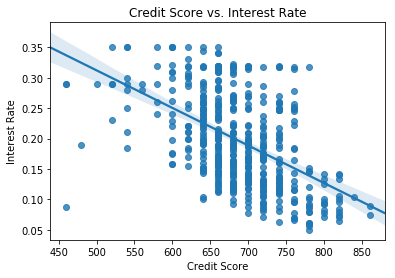

In [22]:
sb.regplot(data = loan_df_samp, x ='CreditScoreRangeLower', y ='BorrowerRate')
plt.xlabel('Credit Score')
plt.ylabel('Interest Rate')
plt.title('Credit Score vs. Interest Rate');

> We can also see the relationship between Interest Rate and Credit Score using  a heat map. 

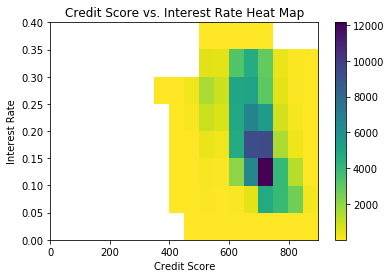

In [23]:
loan_df_csr = loan_df.query('CreditScoreRangeLower > 300')
bins_x = np.arange(0, loan_df_csr['CreditScoreRangeLower'].max()+50, 50)
bins_y = np.arange(0, loan_df_csr['BorrowerRate'].max()+.05, .05)
plt.hist2d(data = loan_df_csr, x = 'CreditScoreRangeLower', y = 'BorrowerRate', bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.xlabel('Credit Score')
plt.ylabel('Interest Rate')
plt.title('Credit Score vs. Interest Rate Heat Map');


> As I expected as Credit Score increases as the interest rate decreases. I also now want to see the average credit score for each Loan Status.  

In [24]:
# I want to look at the main loan statuses to ease my analysis
loan_status_df = loan_df[(loan_df['LoanStatus'] == 'Chargedoff') | (loan_df['LoanStatus'] == 'Completed') | (loan_df['LoanStatus'] == 'Current') | (loan_df['LoanStatus'] == 'Defaulted') | (loan_df['LoanStatus'] == 'Past Due (1-15 days)')] 

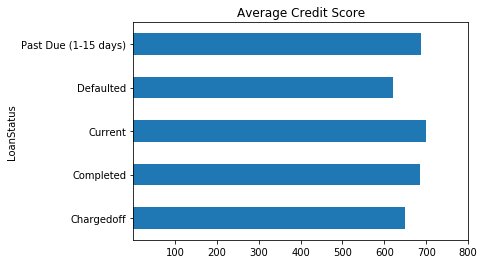

In [25]:
data3 = loan_status_df.groupby('LoanStatus')['CreditScoreRangeLower'].mean()
data3.plot(kind = 'barh', color = base_color)
plt.title('Average Credit Score')
ticks = [100, 200, 300, 400, 500, 600, 700, 800]
plt.xticks(ticks);

> You can see from the visualization above that the credit scores on average are higher for Current and Completed Loan Statuses. This makes a lot of sense, because people with better credit score tend to pay their loans back and on time. 

### Borrower Rate

In [26]:
loan_df.groupby('LoanStatus')['BorrowerRate'].mean()

LoanStatus
Cancelled                 0.184400
Chargedoff                0.235397
Completed                 0.186422
Current                   0.183771
Defaulted                 0.223077
FinalPaymentInProgress    0.196960
Past Due (1-15 days)      0.230797
Past Due (16-30 days)     0.235258
Past Due (31-60 days)     0.232978
Past Due (61-90 days)     0.239965
Past Due (91-120 days)    0.238292
Past Due (>120 days)      0.252713
Name: BorrowerRate, dtype: float64

> I want to look at the distribution of interest rates for each Loan Status to see if lower or higher interest rates are associated with certain statuses. I am using a violin plot to visualize this relationship.

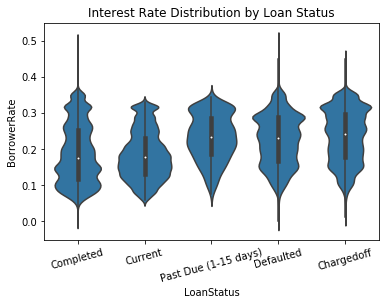

In [27]:
loan_status_df = loan_df[(loan_df['LoanStatus'] == 'Chargedoff') | (loan_df['LoanStatus'] == 'Completed') | (loan_df['LoanStatus'] == 'Current') | (loan_df['LoanStatus'] == 'Defaulted') | (loan_df['LoanStatus'] == 'Past Due (1-15 days)')] 
loan_status_df
base_color = sb.color_palette()[0]
sb.violinplot(data = loan_status_df, x = 'LoanStatus', y = 'BorrowerRate', color = base_color)
plt.xticks(rotation = 15)
plt.title('Interest Rate Distribution by Loan Status');

> It is clear that Completed and Current loan statuses have lower interest rates compared to chargedoff and defaulted. I have a feeling that the higher interest amount makes the loan harder to pay back which can result in a default or chargeoff. 

### DSCR

> The debt service coverage ratio (DSCR) is a key ratio used by financial institutions when underwriting loans. It is calculated by dividing monthly income by monthly payment. The higher the ratio the healthier the lower the credit risk generally. I want to see the relatioship between DSCR and Loan Status.

In [28]:
loan_df['DSCR'] = loan_df['StatedMonthlyIncome'] / loan_df['MonthlyLoanPayment'] 
loan_status_df = loan_df[(loan_df['LoanStatus'] == 'Chargedoff') | (loan_df['LoanStatus'] == 'Completed') | (loan_df['LoanStatus'] == 'Current') | (loan_df['LoanStatus'] == 'Defaulted') | (loan_df['LoanStatus'] == 'Past Due (1-15 days)')] 

In [29]:
loan_DSCR = loan_status_df[(loan_status_df['DSCR'].notna()) & (loan_status_df['DSCR'] > 0) &(loan_status_df['DSCR'] < 100)]

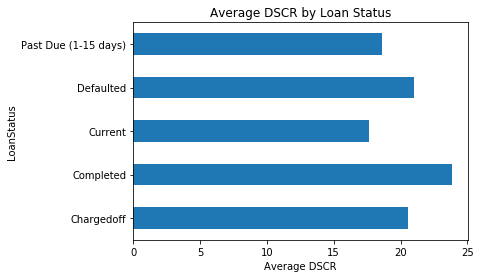

In [30]:
data2 = loan_DSCR.groupby('LoanStatus')['DSCR'].median()
data2.plot(kind = 'barh', color = base_color)
plt.xlabel('Average DSCR')
plt.title('Average DSCR by Loan Status');

> I am actually very surprised to see that the median DSCR is lower for current loans than defaulted and chargedoff loans. This is very unexpected. This is telling me that perhaps monthly income isn't an important deterministic factor for loan status. Interesting!

### Homeownership

>Now I am going to see if homeownership is correlated with Loan Status.

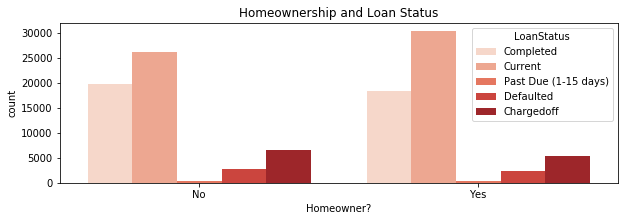

In [31]:
plt.figure(figsize = [10, 10])

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
sb.countplot(data = loan_status_df, x = 'IsBorrowerHomeowner', hue = 'LoanStatus', palette = 'Reds')
plt.title('Homeownership and Loan Status')
plt.xlabel('Homeowner?')

plt.xticks([False, True], ['No', 'Yes']);

> People who own homes seem to have better loan outcomes than those people who do not own homes.

### Loan Delinquencies

> The last bivariate relationship I would like to see is the relatioship between loan delinquencies in the past 7 years and loan status.

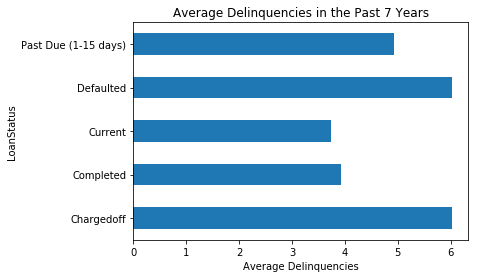

In [32]:
data = loan_status_df.groupby('LoanStatus')['DelinquenciesLast7Years'].mean()
data.plot(kind = 'barh', color = base_color)
plt.xlabel('Average Delinquencies')
plt.title('Average Delinquencies in the Past 7 Years');

> Negative loan statuses are associated with higher average delinquencies over the past 7 years. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I observed that homeowners are stronger borrowers than non-homeowners, a topic I will go deeper in for the multivariate section of this analysis. I also learned that borrowers with a history of more delinqunecies generally have more negative outcomes than borrowers without this history. 
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It was very interesting to me to see that the median DSCR is lower for current loans than defaulted and chargedoff loans. This is very unexpected. This is telling me that perhaps monthly income isn't an important deterministic factor for loan status!

## Multivariate Exploration



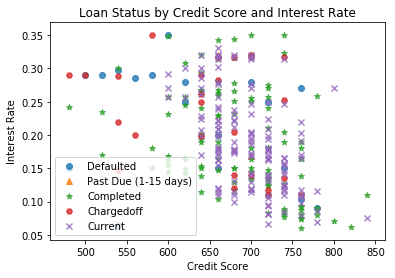

In [33]:
loan_status_samp = loan_status_df.sample(n=300, replace = False)
ttype_markers = [['Defaulted', 'o'], 
                 ['Past Due (1-15 days)', '^'], ['Completed', '*'], ['Chargedoff', 'H'], ['Current', 'x']]

for ttype, marker in ttype_markers:
    plot_data = loan_status_samp.loc[loan_status_samp['LoanStatus'] == ttype]
    sb.regplot(data = plot_data, x = 'CreditScoreRangeLower', y = 'BorrowerRate', x_jitter = 0.04, fit_reg = False, marker = marker);
plt.xlabel('Credit Score')
plt.ylabel('Interest Rate');
plt.legend(['Defaulted', 'Past Due (1-15 days)', 'Completed', 'Chargedoff', 'Current'])
plt.title('Loan Status by Credit Score and Interest Rate');

> You can see the top left of the above chart (low credit score, high interest rate) has more Defaulted and Chargedoff loans. The bottom right (low rate and high credit score) has completed and current loans mainly. This does not really come as a surprise. 

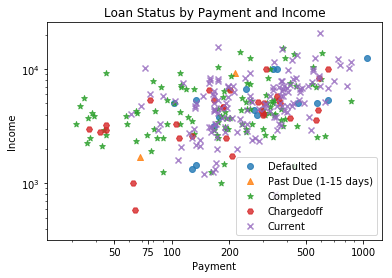

In [34]:
loan_status_samp = loan_status_df.sample(n=300, replace = False)
ttype_markers = [['Defaulted', 'o'], 
                 ['Past Due (1-15 days)', '^'], ['Completed', '*'], ['Chargedoff', 'H'], ['Current', 'x']]

for ttype, marker in ttype_markers:
    plot_data = loan_status_samp.loc[loan_status_samp['LoanStatus'] == ttype]
    sb.regplot(data = plot_data, x = 'MonthlyLoanPayment', y = 'StatedMonthlyIncome', x_jitter = 0.04, fit_reg = False, marker = marker);

plt.ylabel('Income')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Payment')
plt.legend(['Defaulted', 'Past Due (1-15 days)', 'Completed', 'Chargedoff', 'Current'])
labels = ['50', '75', '100', '200', '500', '1000']
plt.xticks([50, 75, 100, 200, 500, 1000], labels)
plt.title('Loan Status by Payment and Income');

>For a given payment amount, borrowers with more income generally had better loan statuses, but this is not a very strong correlation as I orginally expected it to be. 

In [35]:
loan_df['CreditScoreRangeLower'].value_counts()

680.0    16492
660.0    16366
700.0    15471
720.0    12923
640.0    12199
740.0     9267
760.0     6606
780.0     4624
620.0     4172
600.0     3602
800.0     2644
520.0     1593
540.0     1474
820.0     1409
560.0     1357
580.0     1125
840.0      567
500.0      554
480.0      346
860.0      212
460.0      141
0.0        133
440.0       36
880.0       27
420.0        5
360.0        1
Name: CreditScoreRangeLower, dtype: int64

In [36]:
loan_df['Term'].value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

In [37]:
loan_df['ListingCategory (numeric)'].value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

In [38]:
loan_df_multi = loan_status_df[(loan_status_df['Term'] == 36) & (loan_status_df['CreditScoreRangeLower'] == 680) & (loan_status_df['ListingCategory (numeric)'] == 1)]

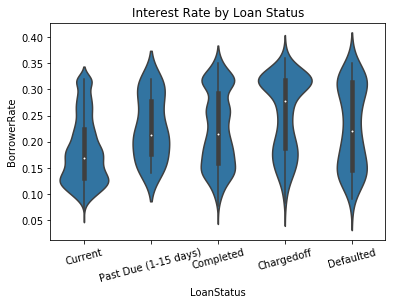

In [39]:
base_color = sb.color_palette()[0]
sb.violinplot(data = loan_df_multi, x = 'LoanStatus', y = 'BorrowerRate', color = base_color)
plt.xticks(rotation = 15)
plt.title('Interest Rate by Loan Status');

In [40]:
loan_df_multi_income = loan_df_multi[(loan_df_multi['StatedMonthlyIncome'] > 4400) & (loan_df_multi['StatedMonthlyIncome'] < 5300)]

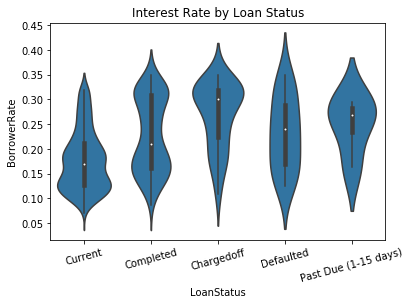

In [41]:
base_color = sb.color_palette()[0]
sb.violinplot(data = loan_df_multi_income, x = 'LoanStatus', y = 'BorrowerRate', color = base_color)
plt.xticks(rotation = 15)
plt.title('Interest Rate by Loan Status');

>I have included this chart in the multivariate exploration section because it does involves many variables even if only two are in the chart. In this chart I really wanted to see the impact of Borrower Interest Rate on Loan Status so I created a new dataframe that had the exact same loan term, credit score, and listing category. In other words these loans have all have a very similar risk profile. I also narrowed down the monthly income so that all these loanees have incomes around the median of the entire dataset. Then I created a violin plot with Borrower Interest Rate on the Y axis and Loan status on the x axis. It is very clear now that higher interest rates make are correllated with worse loan outcomes simply because they are more expensive to pay back. Look spefically at Current Loans vs Chargedoff loans in this chart.

In [42]:
loan_df_multi['StatedMonthlyIncome'].describe()

count     6560.000000
mean      5654.303506
std       3907.659323
min          0.000000
25%       3333.333333
50%       4833.333333
75%       6916.666667
max      96266.500000
Name: StatedMonthlyIncome, dtype: float64

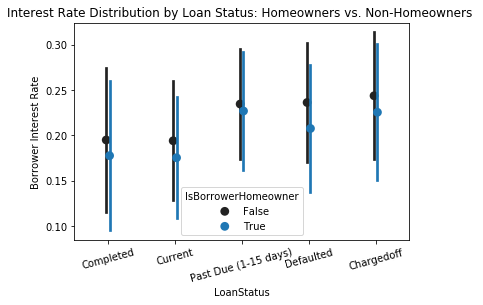

In [43]:
sb.pointplot(data = loan_status_df, x = 'LoanStatus', y = 'BorrowerRate', 
             color = base_color, hue = 'IsBorrowerHomeowner', ci = 'sd', 
             linestyles = "", dodge = True);
plt.xticks(rotation = 15)
plt.ylabel('Borrower Interest Rate')
plt.title('Interest Rate Distribution by Loan Status: Homeowners vs. Non-Homeowners ');

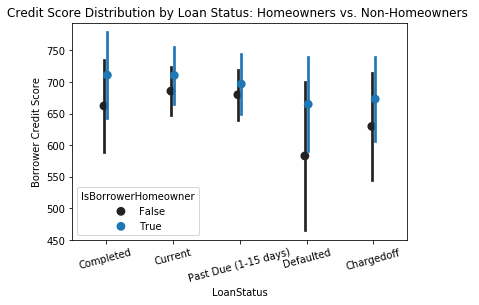

In [44]:
sb.pointplot(data = loan_status_df, x = 'LoanStatus', y = 'CreditScoreRangeLower', 
             color = base_color, hue = 'IsBorrowerHomeowner', ci = 'sd', 
             linestyles = "", dodge = True);
plt.xticks(rotation = 15)
plt.ylabel('Borrower Credit Score')
plt.title('Credit Score Distribution by Loan Status: Homeowners vs. Non-Homeowners ');

> Homeowners are deemed less risky hence the greater credit scores and lower interest rates. 

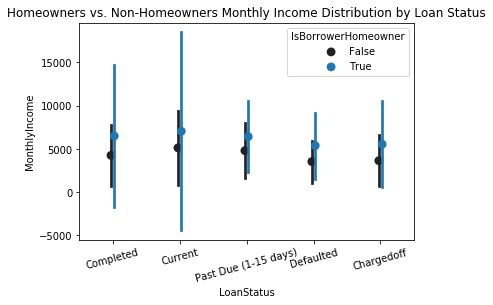

In [45]:
sb.pointplot(data = loan_status_df, x = 'LoanStatus', y = 'StatedMonthlyIncome', 
             color = base_color, hue = 'IsBorrowerHomeowner', ci = 'sd', 
             linestyles = "", dodge = True);
plt.xticks(rotation = 15)
plt.ylabel('MonthlyIncome')
plt.title('Homeowners vs. Non-Homeowners Monthly Income Distribution by Loan Status');

> Homeowners also have average higher incomes than non-homeowners. This is no surprise. 

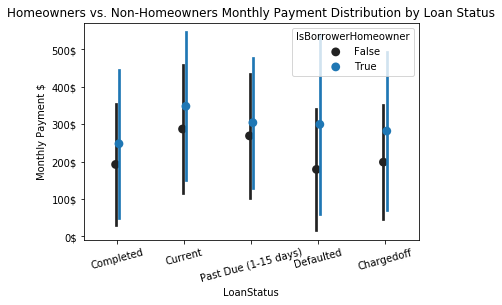

In [46]:
sb.pointplot(data = loan_status_df, x = 'LoanStatus', y = 'MonthlyLoanPayment', 
             color = base_color, hue = 'IsBorrowerHomeowner', ci = 'sd', 
             linestyles = "", dodge = True);
plt.yticks([0,100,200,300,400,500], ['0$', '100$', '200$', '300$', '400$', '500$'])
plt.xticks(rotation = 15)
plt.ylabel('Monthly Payment $')
plt.title('Homeowners vs. Non-Homeowners Monthly Payment Distribution by Loan Status');

> This is a super interesting graph that illustrates a major finding. First, look at the difference in average monthly payment between homeowners and non-homeowners for Completed and Current Loan Statuses, which represent positive loan outcomes. Now look at the difference for Defaulted and Chargedoff loans, which represent negative loan outcomes. Do you see how this is a much bigger difference in average for the negative loan outcomes? When homeowners did have a negative loan outcome(status) they had signicanlty higher monthly payments than non-homeowners on average. This tells me generally in cases where homeowners did face difficulty it was partly because of the higher monthly payment when compared to their counterparts who also faced difficulty and were paying much less per month. This is more evidence that homeowners are better borrowers than non-homeowners generally. 

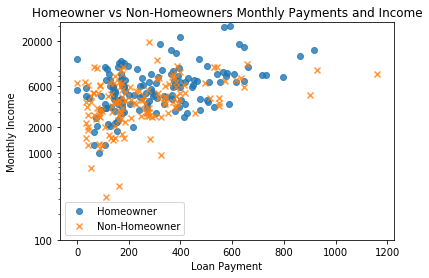

In [47]:
loan_status_samp = loan_status_df.sample(n=300, replace = False)
ttype_markers = [[True, 'o'], 
                 [False, 'x']]

for ttype, marker in ttype_markers:
    plot_data = loan_status_samp.loc[loan_status_samp['IsBorrowerHomeowner'] == ttype]
    sb.regplot(data = plot_data, x = 'MonthlyLoanPayment', y = 'StatedMonthlyIncome', x_jitter = 0.04, fit_reg = False, marker = marker);
plt.xlabel('Loan Payment')
plt.ylabel('Monthly Income')
plt.yscale('log')
plt.yticks([100, 1000, 2000, 6000, 20000],[100, 1000, 2000, 6000, 20000])
plt.legend(['Homeowner', 'Non-Homeowner'])
plt.title('Homeowner vs Non-Homeowners Monthly Payments and Income');

> Another very interesting graph, which shows the strength of homeowners vs non-homeowners as borrowers. Homeowners simply make more money for a given loan payment than non-homeowners. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Homeowners are stronger borrowers than non homeowners this can be seen several times throughout this analysis, but look no further than the chart that shows that for a given monthly payment amount, they make more money than non-Homeowners do. 

### Were there any interesting or surprising interactions between features?

> Nothing surprised me that much to be honest. I work in banking and am very familiar with lending and credit risk.

## Conclusions


> I have made many findings throughout this analysis and visusalization process above. My first main finding is that higher interest rates, independent of other important loan and borrower attributes, make it more difficult for borrowers to repay loans. I have always thought about this paradoxical relationship. On one hand, finanial institutions need to be compensated for greater risk that they take, but on the other hand this extra compensation creates more risk because the loan is harder to repay (more interest)! This is a huge economic and societal issue!!

> My second main finding was that Homeowners are stronger borrowers than non-homeowner are. This is evidenced by higher incomes, higher credit scores, and better loan outcomes. For a given monthly payment they make more money than non-homwoeners do. 




> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

